In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy.stats import mannwhitneyu
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

<function scipy.stats.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)>

In [124]:
full_df = pd.read_csv('Data/flow_time_series.csv')
red_df = pd.read_csv('Data/red_time_series.csv')

In [125]:
full_df['time'] = full_df['time'].astype('int64')
red_df['time'] = red_df['time'].astype('int64')

In [126]:
full_df = full_df.sort_values('time')
red_df = red_df.sort_values('time')

In [127]:
red_df['Log_Upload'] = np.log2(red_df['Upload'])
red_df['Log_Download'] = np.log2(red_df['Download'])

full_df['Log_Upload'] = np.log2(full_df['Upload'])
full_df['Log_Download'] = np.log2(full_df['Download'])

full_df['sqrt_Upload'] = np.sqrt(full_df['Upload'])
full_df['sqrt_Download'] = np.sqrt(full_df['Download'])

red_df['sqrt_Upload'] = np.sqrt(red_df['Upload'])
red_df['sqrt_Download'] = np.sqrt(red_df['Download'])


In [142]:
full_sum_df = full_df.groupby('time',as_index=False).agg({'mean_duration':'mean', 'Upload':'sum','Download':'sum','user':pd.Series.nunique})
red_sum_df = red_df.groupby('time',as_index=False).agg({'mean_duration':'mean', 'Upload':'sum','Download':'sum','user':pd.Series.nunique,'Log_Download':'sum','Log_Upload':'sum'})
              

In [143]:
stat, p = mannwhitneyu(full_df['Log_Upload'], red_df['Log_Upload'])
p

1.2472090832688178e-20

In [144]:
p

1.2472090832688178e-20

# Attempt to use KDE to create distrobution

In [145]:
full_kernel = stats.gaussian_kde(full_df['Log_Upload'])
red_kernel = stats.gaussian_kde(red_df['Log_Upload'])

In [146]:
x = np.linspace(0,40,100)


In [147]:
red_kernel(random.sample(list(red_df['Log_Upload']),1))

array([0.04336211])

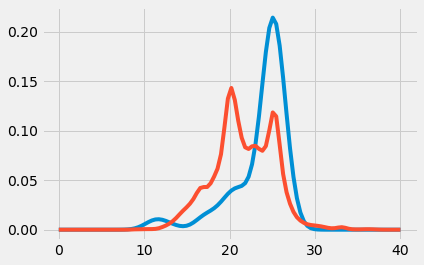

In [148]:
plt.plot(x,red_kernel(x))
plt.plot(x,full_kernel(x))

Text(0.5, 1.0, 'KDE for Compromised Population and Total Population')

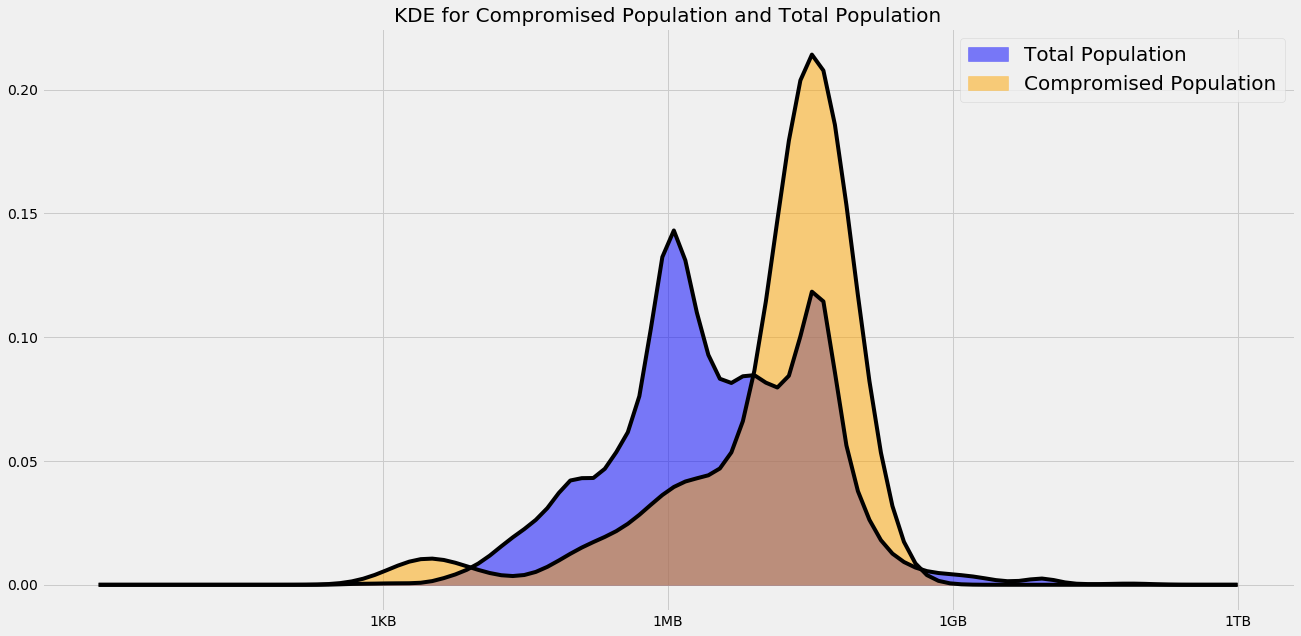

In [149]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,red_kernel(x),color='black')
ax.plot(x,full_kernel(x),color='black')
ax.fill_between(x, full_kernel(x), where=full_kernel(x)>=0, interpolate=True, color='blue',alpha=.5,label='Total Population')
ax.fill_between(x, red_kernel(x), where=red_kernel(x)>=0, interpolate=True, color='orange',alpha=.5,label='Compromised Population')
plt.xticks([10,20,30,40],['1KB','1MB','1GB','1TB'])
plt.legend(prop={'size': 20})
plt.title('KDE for Compromised Population and Total Population',fontsize=20)


([<matplotlib.axis.YTick at 0x1a326d1710>,
 <a list of 5 Text yticklabel objects>)

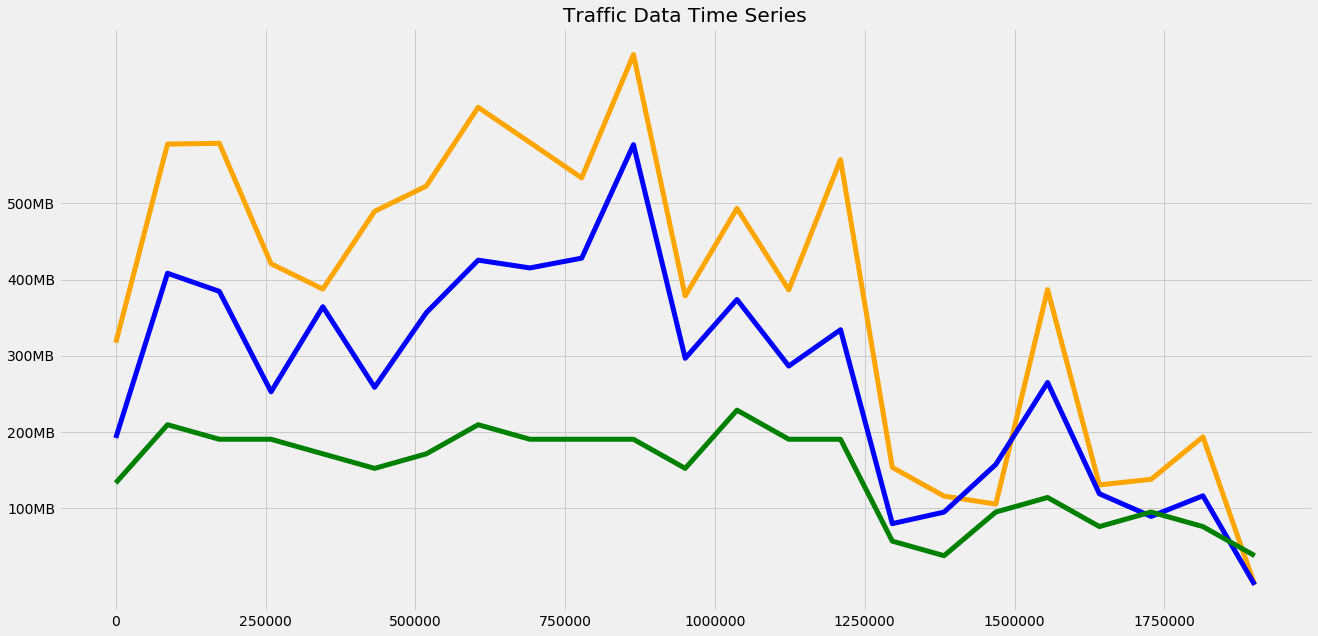

In [169]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(red_sum_df['time'],red_sum_df['Download'] , color='orange',lw=5)
ax.plot(red_sum_df['time'],red_sum_df['Upload'], color='blue',lw=5)

ax.plot(full_sum_df['time'],red_sum_df['user']*20000000, color='g',lw=5)

plt.title('Traffic Data Time Series')
plt.yticks([100*(1024**2),200*(1024**2),300*(1024**2),400*(1024**2),500*(1024**2)],['100MB','200MB','300MB','400MB','500MB',])


([<matplotlib.axis.YTick at 0x1a34111ac8>,
 <a list of 4 Text yticklabel objects>)

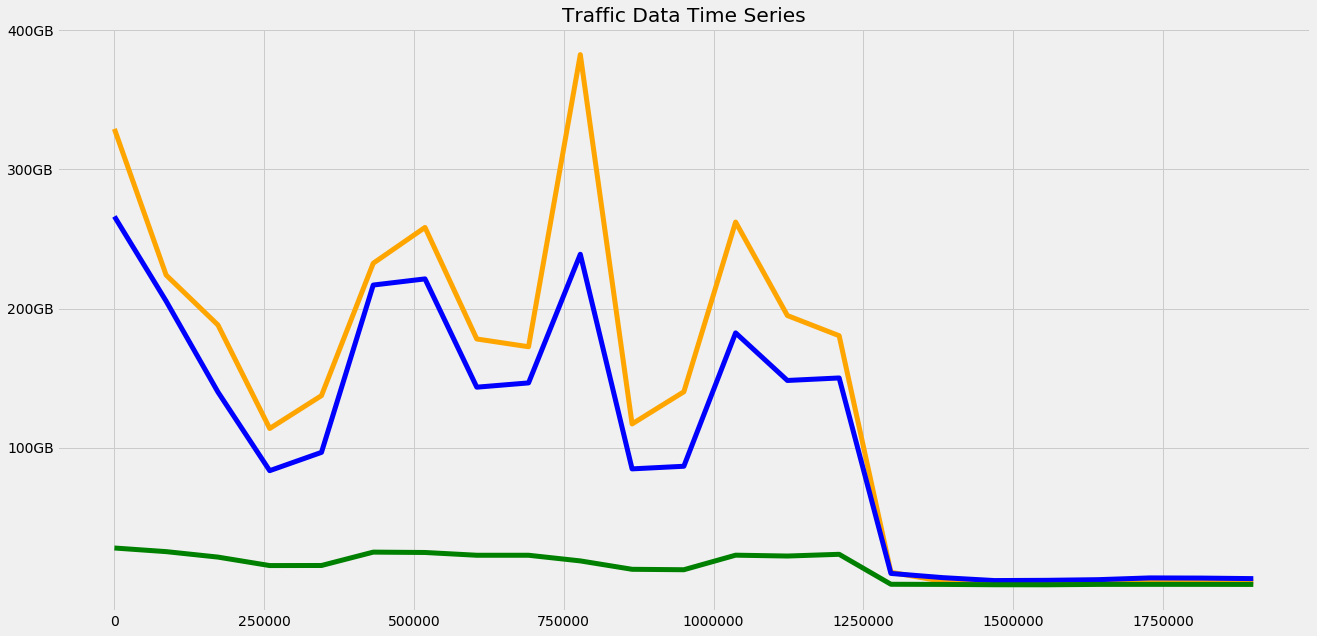

In [176]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(full_sum_df['time'],full_sum_df['Download'] , color='orange',lw=5)
ax.plot(full_sum_df['time'],full_sum_df['Upload'], color='blue',lw=5)

ax.plot(full_sum_df['time'],full_sum_df['user']*20000000, color='g',lw=5)

plt.title('Traffic Data Time Series')
plt.yticks([100*(1024**3),200*(1024**3),300*(1024**3),400*(1024**3)],['100GB','200GB','300GB','400GB',])


<BarContainer object of 23 artists>

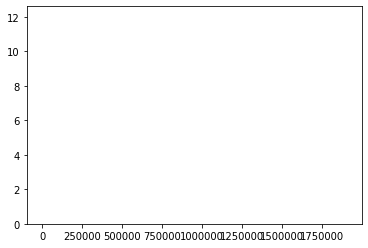

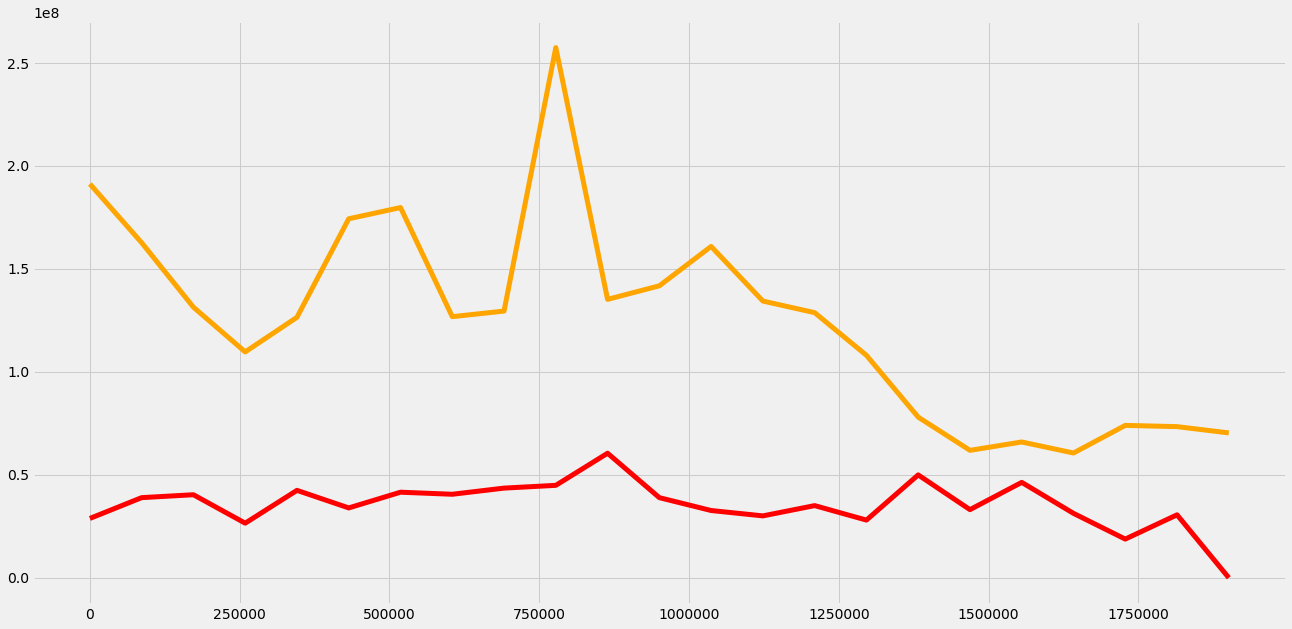

In [172]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(red_sum_df['time'],red_sum_df['Upload']/ red_sum_df['user'], color='red',lw=5,label='Compromised Uploads')
ax.plot(red_sum_df['time'],full_sum_df['Upload']/full_sum_df['user'], color='orange',lw=5,label = 'Total Population Uploads')
